## Test classification with Scikit-learn library. Visualization and Analysis</b>

In [15]:
import os
import csv
import re
import codecs
import nltk.corpus

# Data analytics
import numpy  as np
import pandas as pd
import csv
import sys, csv, ctypes as ct

import nltk
from nltk.tokenize                    import word_tokenize
from nltk                             import SnowballStemmer
from nltk.corpus import stopwords
from pymystem3 import Mystem

# Sklearn clustering methods
from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import LabelEncoder
from nltk.corpus import wordnet as wn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn import model_selection, naive_bayes, svm # Import naiveBayes and svm classifier
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.neighbors import KNeighborsClassifier # Import Kneigbors Classifier
from sklearn.neighbors.nearest_centroid import NearestCentroid
from sklearn.pipeline import Pipeline
from sklearn import metrics
from sklearn.metrics import accuracy_score # For accuracy score estimation

# Visualization
import matplotlib as mpl
from matplotlib import pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import seaborn as sns

In [16]:
# To be able to analyze csv files with huge fields, we should maximize the field size
print(sys.platform, sys.maxsize)
print(csv.field_size_limit())
csv.field_size_limit(int(ct.c_ulong(-1).value // 2))
limit1 = csv.field_size_limit()
limit1

win32 9223372036854775807
2147483647


2147483647

In [17]:
PATH = "Общий корпус. Бакал. 4 курс"
list_of_files = os.listdir(PATH)
res = []

with open('data_for_classification.csv', 'w', newline='', encoding="UTf-8", errors='ignore') as csv_file:
    csv_writer = csv.writer(csv_file, delimiter = ';')
    num_docs = 0
    for name in list_of_files:
        num_docs += 1
        with open(PATH + "\\" + name, 'r', encoding="UTF-8", errors='ignore') as file:
            result = file.read().replace('\n', '')
            file_class = str(name.split('_')[0])
            csv_writer.writerow([num_docs, result, name, file_class])
print(num_docs)

231


In [18]:
df = pd.read_csv('data_for_classification.csv', sep=';', header=None, engine='python', error_bad_lines=False, encoding="utf-8")
df.to_csv('data_for_classification.csv', sep = ';', header=["Number", "Text", "FileName", "Label"], index=False)
data = pd.read_csv('data_for_classification.csv', sep=";", engine='python', encoding="UTF-8")
data.set_index('Number')
data.head()

,Number,Text,FileName,Label
0,1,"""В Петербурге возобновили плановую вакцинацию ...",bumaga_1.txt,bumaga
1,2,"Там добавили, что пока смерть пациента с корон...",bumaga_10.txt,bumaga
2,3,нарушения в период режима повышенной готовност...,bumaga_11.txt,bumaga
3,4,"комментировать «Бумаге» информацию о том, пров...",bumaga_12.txt,bumaga
4,5,Москве выявлено новых заражений в Московской о...,bumaga_13.txt,bumaga


In [19]:
def processCorpus(corpus, language):
    mystem = Mystem() 
    param_stemmer = SnowballStemmer(language)
    stopwords = nltk.corpus.stopwords.words(language)
    final_words = []
    
    corpus["Text_final"] = [entry.lower() for entry in corpus['Text']]
    corpus["Text_final"]= [word_tokenize(entry) for entry in corpus["Text_final"]]
    
    for index, entry in enumerate(corpus.Text_final):
        final_words = []
        word_lemmatized = WordNetLemmatizer()
        
        #final_words = [word for word in entry if word.isalpha() and word not in stopwords]
        for word in entry:
            if word not in stopwords and word.isalpha():
                #word_final = mystem.lemmatize(word)
                #word_final = param_stemmer.stem(word)
                final_words.append(word)
                corpus.loc[(corpus['Number'] == index+1), "Text_final"] = " ".join(final_words)
                
    return corpus

In [20]:
language = 'russian'
data = processCorpus(data, language)

In [21]:
data[:10]

,Number,Text,FileName,Label,Text_final
0,1,"""В Петербурге возобновили плановую вакцинацию ...",bumaga_1.txt,bumaga,петербурге возобновили плановую вакцинацию дет...
1,2,"Там добавили, что пока смерть пациента с корон...",bumaga_10.txt,bumaga,добавили пока смерть пациента коронавирусом бо...
2,3,нарушения в период режима повышенной готовност...,bumaga_11.txt,bumaga,нарушения период режима повышенной готовности ...
3,4,"комментировать «Бумаге» информацию о том, пров...",bumaga_12.txt,bumaga,комментировать бумаге информацию проводятся ку...
4,5,Москве выявлено новых заражений в Московской о...,bumaga_13.txt,bumaga,москве выявлено новых заражений московской обл...
5,6,решили ограничить въезд и выезд в населенные п...,bumaga_14.txt,bumaga,решили ограничить въезд выезд населенные пункт...
6,7,года Оперативный штаб по противодействию распр...,bumaga_15.txt,bumaga,года оперативный штаб противодействию распрост...
7,8,привозят продуктовые наборы которые состоят из...,bumaga_16.txt,bumaga,привозят продуктовые наборы которые состоят па...
8,9,наказания историка Сергея Колтырина осужденног...,bumaga_17.txt,bumaga,наказания историка сергея колтырина осужденног...
9,10,проблемы мира на нашей планетеВ году разрабаты...,bumaga_18.txt,bumaga,проблемы мира нашей планетев году разрабатывае...


In [22]:
Train_X, Test_X, Train_Y, Test_Y = model_selection.train_test_split(data['Text_final'], data['Label'],test_size=0.6)

In [23]:
Encoder = LabelEncoder()
Train_Y = Encoder.fit_transform(Train_Y)
Test_Y = Encoder.fit_transform(Test_Y)

In [38]:
Tfidf_vect = TfidfVectorizer(max_features=5000)
X = Tfidf_vect.fit_transform(data['Text_final'])
tf_idf = pd.DataFrame(data = X.toarray(), columns=Tfidf_vect.get_feature_names())
Train_X_Tfidf = Tfidf_vect.transform(Train_X)
Test_X_Tfidf = Tfidf_vect.transform(Test_X)
tf_idf.shape

(231, 5000)

In [39]:
print(Tfidf_vect.vocabulary_) # the vocabulary that it has learned from the corpus

{'петербурге': 2786, 'детей': 855, 'коронавируса': 1625, 'сняли': 3998, 'запрет': 1185, 'начале': 2188, 'апреля': 62, 'постановление': 3111, 'главного': 614, 'врача': 480, 'опубликовано': 2523, 'сайте': 3726, 'взрослых': 318, 'пока': 2946, 'пояснили': 3156, 'комитете': 1580, 'здравоохранению': 1243, 'проводится': 3331, 'лишь': 1787, 'например': 2136, 'сделать': 3799, 'против': 3385, 'решение': 3626, 'касается': 1506, 'новости': 2308, 'распространении': 3539, 'городе': 674, 'читайте': 4869, 'рубрике': 3687, 'бумаги': 214, 'коронавирус': 1624, 'десятки': 853, 'сотрудников': 4112, 'больницы': 151, 'заразились': 1198, 'коронавирусом': 1628, 'начинают': 2197, 'прием': 3247, 'больных': 155, 'примерно': 3274, 'обнаружили': 2357, 'сообщает': 4073, 'тасс': 4386, 'ссылкой': 4182, 'словам': 3916, 'часть': 4837, 'заболевших': 1110, 'находится': 2179, 'стационаре': 4229, 'дома': 922, 'бумаге': 213, 'сообщили': 4081, 'информации': 1394, 'больнице': 149, 'принимать': 3283, 'пациентов': 2720, 'врачей'

#### 1. Naive Bayes Classifier

In [40]:
# fit the training dataset on the NB classifier
Naive = naive_bayes.MultinomialNB()
naive = Naive.fit(Train_X_Tfidf,Train_Y)
predictions = Naive.predict(Test_X_Tfidf)
predictions_NB = Naive.predict(tf_idf)

data['NaiveBayes'] = predictions_NB
print(metrics.classification_report(Test_Y, predictions))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.64      1.00      0.78        58
           2       0.00      0.00      0.00         7
           3       1.00      0.96      0.98        23
           4       1.00      0.73      0.85        15
           5       0.00      0.00      0.00         7
           6       1.00      0.50      0.67        12
           7       0.00      0.00      0.00         7

    accuracy                           0.77       139
   macro avg       0.58      0.52      0.53       139
weighted avg       0.70      0.77      0.71       139



D:\Python Programming\Mathematical Models\3.7.6py\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### 2. Support Vector Machine (SVM)

In [41]:
# Classifier - Algorithm - SVM
# fit the training dataset on the classifier
SVM = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
SVM.fit(Train_X_Tfidf,Train_Y)
# predict the labels on validation dataset
predictions = SVM.predict(Test_X_Tfidf)
# Use accuracy_score function to get the accuracy
print("SVM Accuracy Score -> ",accuracy_score(predictions, Test_Y)*100)

predictions_SVM = SVM.predict(tf_idf)
print(metrics.classification_report(Test_Y, predictions))

SVM Accuracy Score ->  87.76978417266187
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.81      1.00      0.89        58
           2       1.00      0.57      0.73         7
           3       0.88      0.96      0.92        23
           4       1.00      0.80      0.89        15
           5       1.00      0.29      0.44         7
           6       1.00      0.92      0.96        12
           7       1.00      0.43      0.60         7

    accuracy                           0.88       139
   macro avg       0.96      0.74      0.80       139
weighted avg       0.90      0.88      0.86       139



#### 3. Decision Tree

In [42]:
clf = DecisionTreeClassifier(max_features = 'auto')
clf = clf.fit(Train_X_Tfidf,Train_Y)
predictions = clf.predict(Test_X_Tfidf)
print("DecisionTree Accuracy Score -> ",accuracy_score(predictions, Test_Y)*100)

predictions_DecTree = clf.predict(tf_idf)
print(metrics.classification_report(Test_Y, predictions))

DecisionTree Accuracy Score ->  65.46762589928058
              precision    recall  f1-score   support

           0       0.39      0.70      0.50        10
           1       0.89      1.00      0.94        58
           2       0.38      0.43      0.40         7
           3       0.44      0.48      0.46        23
           4       0.75      0.20      0.32        15
           5       0.17      0.14      0.15         7
           6       0.62      0.42      0.50        12
           7       0.60      0.43      0.50         7

    accuracy                           0.65       139
   macro avg       0.53      0.47      0.47       139
weighted avg       0.67      0.65      0.64       139



#### 4. k-nearest neighbors algorithm

In [43]:
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn = knn.fit(Train_X_Tfidf,Train_Y)
predictions = knn.predict(Test_X_Tfidf)
print("DKNeighborsClassifier Accuracy Score -> ",accuracy_score(predictions, Test_Y)*100)

predictions_KNeighbour = knn.predict(tf_idf)
print(metrics.classification_report(Test_Y, predictions))

DKNeighborsClassifier Accuracy Score ->  93.5251798561151
              precision    recall  f1-score   support

           0       0.71      1.00      0.83        10
           1       1.00      1.00      1.00        58
           2       0.58      1.00      0.74         7
           3       1.00      1.00      1.00        23
           4       1.00      0.87      0.93        15
           5       1.00      1.00      1.00         7
           6       1.00      1.00      1.00        12
           7       0.00      0.00      0.00         7

    accuracy                           0.94       139
   macro avg       0.79      0.86      0.81       139
weighted avg       0.91      0.94      0.92       139



D:\Python Programming\Mathematical Models\3.7.6py\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### 5. ROCCIO

In [44]:
roccio = NearestCentroid()
roccio.fit(Train_X_Tfidf,Train_Y)
predictions = roccio.predict(Test_X_Tfidf)
print("DKNeighborsClassifier Accuracy Score -> ",accuracy_score(predictions, Test_Y)*100)

predictions_Roccio = roccio.predict(tf_idf)
print(metrics.classification_report(Test_Y, predictions))

DKNeighborsClassifier Accuracy Score ->  91.36690647482014
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.84      1.00      0.91        58
           2       1.00      0.57      0.73         7
           3       1.00      0.96      0.98        23
           4       1.00      0.80      0.89        15
           5       0.83      0.71      0.77         7
           6       1.00      0.92      0.96        12
           7       1.00      0.71      0.83         7

    accuracy                           0.91       139
   macro avg       0.96      0.83      0.88       139
weighted avg       0.93      0.91      0.91       139



In [45]:
# Write down the results of each algorithm predictions
data['NaiveBayes'] = predictions_NB
data['SVM'] = predictions_SVM
data['DecisionTree'] = predictions_DecTree
data['KNeigbors'] = predictions_KNeighbour
data["Roccio"] = predictions_Roccio

In [46]:
data[115:125]

,Number,Text,FileName,Label,Text_final,NaiveBayes,SVM,DecisionTree,KNeigbors,Roccio
115,116,место бывший ризница пенс старое деньга и зарж...,children_95.txt,children,место бывший ризница пенс старое деньга заржав...,1,1,1,1,1
116,117,или оглушать шум человеческий деятельность моч...,children_96.txt,children,оглушать шум человеческий деятельность мочь во...,1,1,1,1,1
117,118,и множество другой звук что такой случиться в ...,children_97.txt,children,множество звук случиться мир почему весь пошло...,1,1,1,1,1
118,119,в состав береговой авиация береговой авиация… ...,children_98.txt,children,состав береговой авиация береговой берег неред...,1,1,1,1,1
119,120,увидеть а потом уже услышать когда она наговор...,children_99.txt,children,увидеть услышать наговорить губа шевелиться го...,1,1,1,1,1
120,121,"Константин Хабенский, Сергей Безруков, Елизаве...",cinema_1.txt,cinema,константин хабенский сергей безруков елизавета...,1,2,6,2,2
121,122,Сначала я удивлялась и восхищалась умению и из...,cinema_10.txt,cinema,сначала удивлялась восхищалась умению изобрета...,1,2,0,2,2
122,123,Луч света в царстве тьмы При просмотре фильм...,cinema_2.txt,cinema,луч света царстве тьмы просмотре фильма ирония...,1,1,5,2,1
123,124,"Степанов Сергей31 декабря 2019, 11:30 Уважае...",cinema_3.txt,cinema,степанов декабря уважаемому честному автору ог...,1,2,2,2,2
124,125,Хип-хоп. Музыка как соединение культур Хип-х...,cinema_4.txt,cinema,музыка соединение культур зародившийся году юж...,1,2,2,2,2


Text(0, 0.5, 'Predicted label')

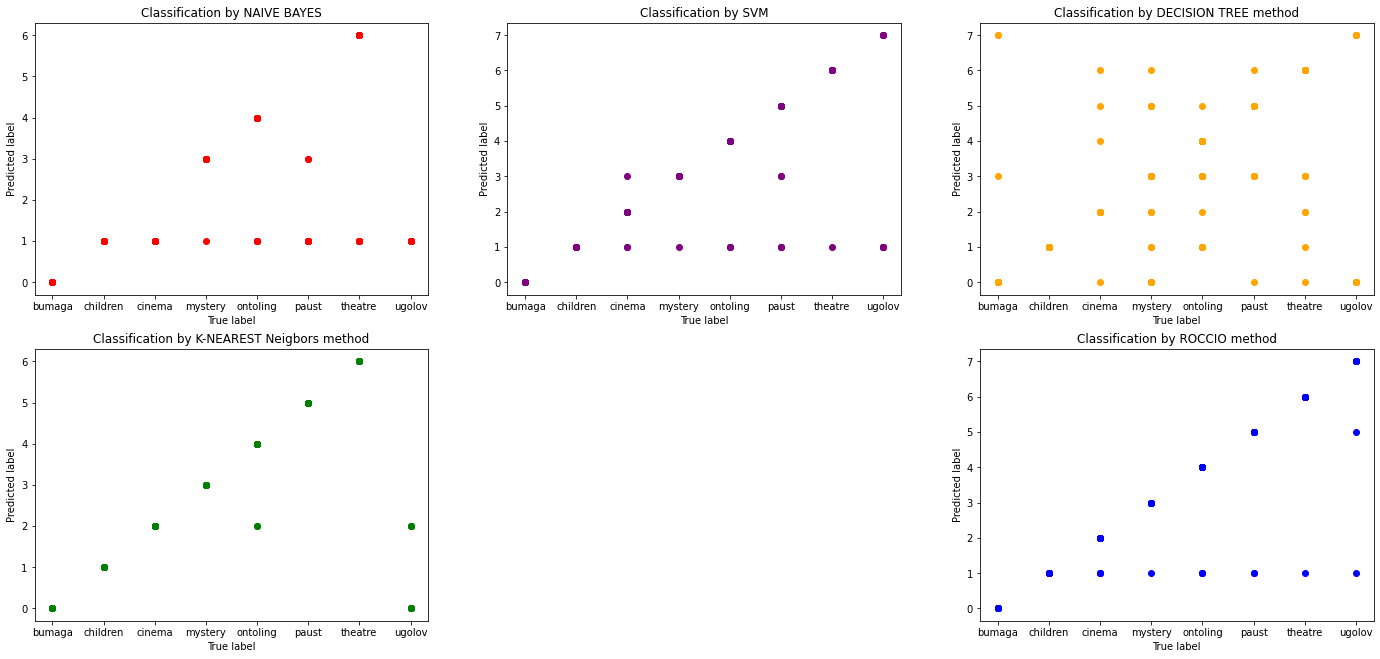

In [47]:
fig = plt.figure(figsize=(24, 11))
spec = mpl.gridspec.GridSpec(ncols=3, nrows=2)

ax1 = fig.add_subplot(spec[0,0])
ax2 = fig.add_subplot(spec[0,1])
ax3 = fig.add_subplot(spec[0,2])
ax4 = fig.add_subplot(spec[1,0])
ax5 = fig.add_subplot(spec[1,2])

ax1.scatter(data['Label'], data['NaiveBayes'], color='red')
ax2.scatter(data['Label'], data['SVM'], color='purple')
ax3.scatter(data['Label'], data['DecisionTree'], color='orange')
ax4.scatter(data['Label'], data['KNeigbors'], color = 'green')
ax5.scatter(data['Label'], data['Roccio'], color = 'blue')

# set a title and labels
ax1.set_title('Classification by NAIVE BAYES')
ax1.set_xlabel('True label')
ax1.set_ylabel('Predicted label')

ax2.set_title('Classification by SVM')
ax2.set_xlabel('True label')
ax2.set_ylabel('Predicted label')

ax3.set_title('Classification by DECISION TREE method')
ax3.set_xlabel('True label')
ax3.set_ylabel('Predicted label')

ax4.set_title('Classification by K-NEAREST Neigbors method')
ax4.set_xlabel('True label')
ax4.set_ylabel('Predicted label')

ax5.set_title('Classification by ROCCIO method')
ax5.set_xlabel('True label')
ax5.set_ylabel('Predicted label')